<a href="https://colab.research.google.com/github/rlawogjs96/deeplearningnlp_starters/blob/main/bag_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. 단어의 표현 방법 
Local Representation * Distributed Representation. Local Representations only focus on the actual word and map a specific value. Distributed Representations focus on nearby words to understand the actual word.

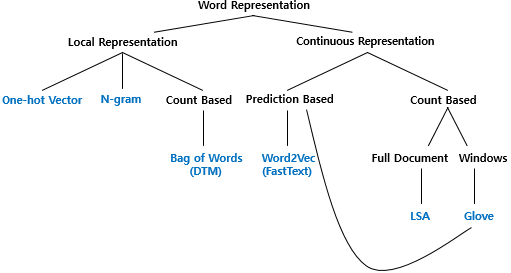

#### 2. Bag of Words 
순서는 고려하지 않고, 단어들의 출현 빈도 (frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법이다. 

* 1) 각 단어에 고유한 정수 인덱스를 부여 # 단어 집합 생성 
* 2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터 생성

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 6.3 MB/s 
     |████████████████████████████████| 453 kB 54.5 MB/s 


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from konlpy.tag import Okt 
okt = Okt()

In [ ]:
def build_bag_of_words(document): 
  #온점 제거 및 형태소 분석 
  document = document.replace(".", '')
  tokenized_document = okt.morphs(document) 

  word_to_index = {} 
  bow = []

  for word in tokenized_document: 
    if word not in word_to_index.keys(): 
      word_to_index[word] = len(word_to_index)
      # BoW에 전부 기본값 1을 넣는다. 
      bow.insert(len(word_to_index) -1, 1)
    else: 
      # 재등장하는 단어의 인덱스 
      index = word_to_index.get(word) 
      # 재등장하는 단어는 해당하는 인덱스의 위치에 1을 더한다. 
      bow[index] = bow[index] + 1
      
  return word_to_index, bow 

In [ ]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1) 
print('vocabulary: ', vocab)
print('bag of words vector: ', bow)

vocabulary:  {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector:  [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


물가상승률은 두 번 언급되었기 때문에 인덱스 4에 해당하는 값이 2이다. 인덱스는 0부터 시작됨. 물가상승률은 BoW에서 다섯번째 값이다. 

#### 3. Other BoW Examples


In [ ]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

In [ ]:
vocab, bow = build_bag_of_words(doc2) 
print('vocabulary: ', vocab)
print('bag of words vector: ', bow)

vocabulary:  {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector:  [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [ ]:
doc3 = doc1 + ' ' + doc2
print(doc3)

정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다. 소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.


In [ ]:
vocab, bow = build_bag_of_words(doc3)
print('vocabulary: ', vocab)
print('bag of words vector: ',bow)

vocabulary:  {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector:  [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


#### 4. CountVecotr 클래스로 BoW 만들기 
sklearn 에서는 단어의 빈도를 Count 하여 Vecotr로 만드는 CountVectorizer 클래스를 지원한다. 이를 이용하면 영어에 대해서는 손쉽게 BoW를 만들 수 있다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [ ]:
corpus  = ['you know I want your love. because I love you.']
vector = CountVectorizer() 

# 코퍼스로부터 각 단어의 빈도수를 기록 
print('bag of words vector: ', vector.fit_transform(corpus).toarray())

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력 
print('vocabulary: ',vector.vocabulary_)

bag of words vector:  [[1 1 2 1 2 1]]
vocabulary:  {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


you 와 love는 두 번씩 언급되었으므로 각각 인덱스 2와 인덱스 4에서 2의 값을 가진다. 그 외의 값들은 1을 갖는다. 

CountVectorizer가 기본적으로 길이가 2 이상인 문자에 대해서만 토큰으로 인식하기 때문에 I는 사라젔다. 영어에서는 길이가 짧은 문자는 제거하는 것 또한 전처리 작업으로 고려된다. 

단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다. 한국어에 CountVectorizer를 적용하면 조사 등의 이유로 제대로 BoW가 만들어지지 않음을 의미한다.

#### 5. 불용어를 제거한 BoW

불용어를 제거하는 일은 자연어처리의 정확도를 높이기 위해서 선택할 수 있는 전처리 기법.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector: ', vect.fit_transform(text).toarray())
print('vocabulary: ', vect.vocabulary_)

bag of words vector:  [[1 1 1 1 1]]
vocabulary:  {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}
